# SUPPLY CHAIN OPTIMIZATION

## Import Packages

In [1]:
import pandas as pd
from pulp import LpProblem, LpMinimize, LpVariable, lpSum
import matplotlib.pyplot as plt

## Load Data

In [2]:
data=pd.read_csv("supply_chain_data.csv")
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [3]:
data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [5]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [6]:
data.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [7]:
transportation_data = data[['Location', 'Routes', 'Transportation modes']].drop_duplicates()
transportation_data

,Location,Routes,Transportation modes
0,Mumbai,Route B,Road
2,Mumbai,Route C,Air
3,Kolkata,Route A,Rail
4,Delhi,Route A,Air
5,Bangalore,Route A,Road
6,Kolkata,Route A,Sea
7,Bangalore,Route C,Road
8,Mumbai,Route B,Sea
9,Chennai,Route B,Rail
10,Kolkata,Route B,Road


## Process Supply, Demand, and Cost Data

In [8]:
supply_data = data.groupby('Location')['Stock levels'].sum()

In [9]:
demand_data = data.groupby('Routes')['Order quantities'].sum()

In [10]:
cost_data = data[['Location', 'Routes', 'Costs']].drop_duplicates()
cost_data

,Location,Routes,Costs
0,Mumbai,Route B,187.752075
1,Mumbai,Route B,503.065579
2,Mumbai,Route C,141.920282
3,Kolkata,Route A,254.776159
4,Delhi,Route A,923.440632
...,...,...,...
95,Mumbai,Route A,778.864241
96,Mumbai,Route A,188.742141
97,Mumbai,Route A,540.132423
98,Chennai,Route A,882.198864


In [11]:
supply_nodes = supply_data.index.tolist()
demand_nodes = demand_data.index.tolist()

In [12]:
cost_dict = {
    (row['Location'], row['Routes']): row['Costs']
    for _, row in cost_data.iterrows()
}

## Initialize The Optimization Model

In [13]:
model = LpProblem("Supply_Chain_Optimization", LpMinimize)

## Define Decision Variables For Transportation Quantities

In [14]:
transport_vars = {
    (supply, demand): LpVariable(f"x_{supply}_{demand}", lowBound=0)
    for supply in supply_nodes
    for demand in demand_nodes
}

## Objective Function: Minimize Transportation Costs

In [15]:
model += lpSum(
    transport_vars[supply, demand] * cost_dict[supply, demand]
    for supply in supply_nodes
    for demand in demand_nodes
    if (supply, demand) in cost_dict
)

## Constraints: Ensure Supply Limits Are Respected

In [16]:
for supply in supply_nodes:
    model += lpSum(
        transport_vars[supply, demand] for demand in demand_nodes
        if (supply, demand) in cost_dict
    ) <= supply_data[supply], f"Supply_Constraint_{supply}"

## Constraints: Ensure Demand Requirements Are Met

In [17]:
for demand in demand_nodes:
    model += lpSum(
        transport_vars[supply, demand] for supply in supply_nodes
        if (supply, demand) in cost_dict
    ) >= demand_data[demand], f"Demand_Constraint_{demand}"

## Solve The Model

In [18]:
model.solve()

-1

## Extract Results

In [19]:
results = {
    (supply, demand): transport_vars[supply, demand].value()
    for supply in supply_nodes
    for demand in demand_nodes
    if (supply, demand) in cost_dict and transport_vars[supply, demand].value() > 0
}

In [20]:
total_cost = sum(
    transport_vars[supply, demand].value() * cost_dict[supply, demand]
    for supply in supply_nodes
    for demand in demand_nodes
    if (supply, demand) in cost_dict
)

## Output Results

In [21]:
print("Optimal Transport Plan:")
for (supply, demand), quantity in results.items():
    print(f"Transport {quantity} units from {supply} to {demand}")

Optimal Transport Plan:
Transport 856.0 units from Bangalore to Route C
Transport 799.0 units from Chennai to Route B
Transport 896.0 units from Delhi to Route A
Transport 948.0 units from Kolkata to Route A
Transport 335.0 units from Kolkata to Route B
Transport 156.0 units from Kolkata to Route C
Transport 932.0 units from Mumbai to Route B


In [22]:
print(f"Total Transportation Cost: {total_cost}")

Total Transportation Cost: 1446690.1606400139


## Visualization

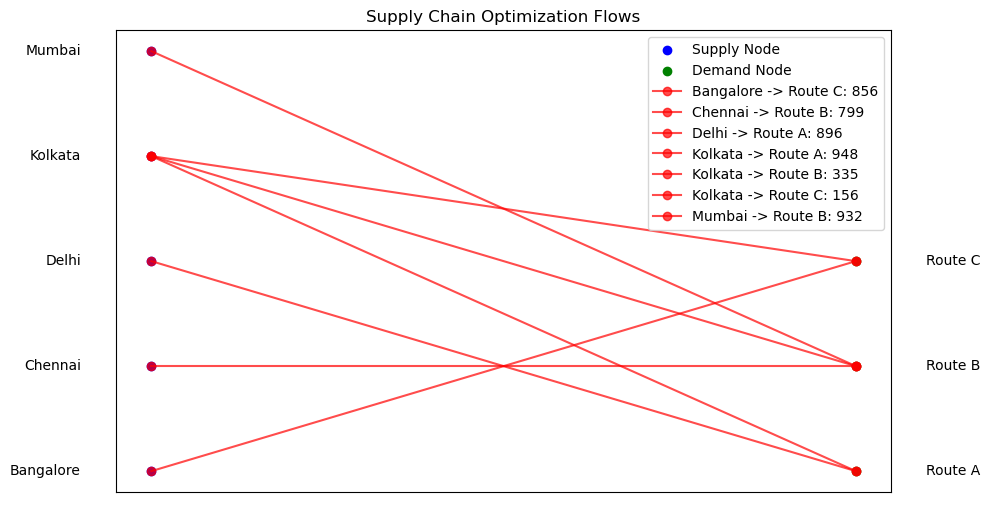

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
for i, supply in enumerate(supply_nodes):
    ax.scatter(0, i, color='blue', label='Supply Node' if i == 0 else "")
    ax.text(-0.1, i, supply, va='center', ha='right')

for i, demand in enumerate(demand_nodes):
    ax.scatter(1, i, color='green', label='Demand Node' if i == 0 else "")
    ax.text(1.1, i, demand, va='center', ha='left')

for (supply, demand), quantity in results.items():
    supply_idx = supply_nodes.index(supply)
    demand_idx = demand_nodes.index(demand)
    ax.plot([0, 1], [supply_idx, demand_idx], 'ro-', alpha=0.7, label=f"{supply} -> {demand}: {quantity:.0f}")
    
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Supply Chain Optimization Flows")
ax.legend(loc="upper right")
plt.show()